# 随机森林

集成学习（ensemble learning）是时下非常流行的机器学习算法，它本身不是一个单独的机器学习算法，而是通过在数据上构建多个模型，集成所有模型的建模结果。

集成算法会考虑多个评估器的建模结果，汇总之后得到一个综合的结果，以此来获取比单个模型更好的回归或分类表现。

随机森林的本质是一种装袋集成算法（bagging），装袋集成算法是对基评估器的预测结果进行平均或用多数表决原则来决定集成评估器的结果。

# 随机森林分类

导入相关包

In [2]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [3]:
wine = load_wine()
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [4]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(wine.data, wine.target, test_size=0.3)

In [5]:
# 实例化模型
dtc = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
# 训练模型
dtc.fit(Xtrain,ytrain)
rfc.fit(Xtrain,ytrain)
# 获取评分
score_dtc = dtc.score(Xtest,ytest)
score_rfc = rfc.score(Xtest,ytest)

print("Single Tress:{},Random Forest:{}".format(score_dtc,score_rfc))

Single Tress:0.8888888888888888,Random Forest:0.9629629629629629


## 交叉验证

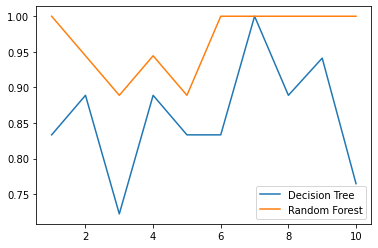

In [6]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25)
score_rfc = cross_val_score(rfc,wine.data,wine.target,cv=10)

dtc = DecisionTreeClassifier()
score_dtc = cross_val_score(dtc,wine.data,wine.target,cv=10)

plt.plot(range(1,11),score_dtc,label = "Decision Tree")
plt.plot(range(1,11),score_rfc,label = "Random Forest")
plt.legend()
plt.show()

## 画出随机森林和决策树在十组交叉验证下的效果对比

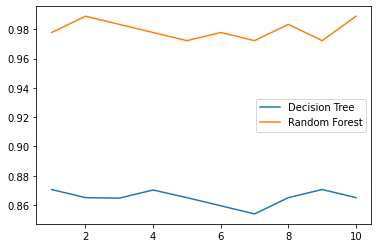

In [7]:
dtc_list = []
rfc_list = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    score_rfc = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_list.append(score_rfc)

    dtc = DecisionTreeClassifier()
    score_dtc = cross_val_score(dtc,wine.data,wine.target,cv=10).mean()
    dtc_list.append(score_dtc)

plt.plot(range(1,11),dtc_list,label = "Decision Tree")
plt.plot(range(1,11),rfc_list,label = "Random Forest")
plt.legend()
plt.show()

## n_estimators 学习曲线

0.9888888888888889 18


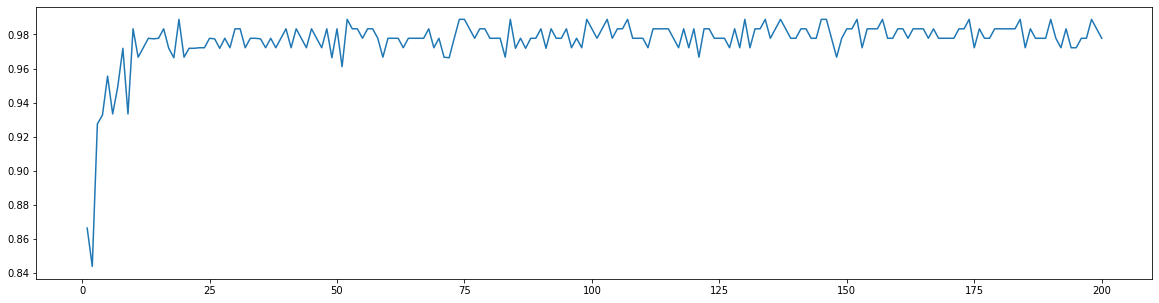

In [21]:
l = []

for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    score_rfc = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    l.append(score_rfc)
print(max(l),l.index(max(l)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),l)
plt.show()

## random_state

在决策树中，一个random_state只控制生成一棵树，而随机森林中的random_state控制的是生成森林的模式，而非让一个森林中只有一棵树，即随机森林中每个数的random_state都是不一样的
。

In [9]:
rfc = RandomForestClassifier(n_estimators=25,random_state=2)
rfc = rfc.fit(Xtrain,ytrain)

In [11]:
# 随机森林中重要的属性之一：estimators_,用于查看随机森林中数的状态
rfc.estimators_[0].random_state

1872583848

## 随机森林袋外数据

In [17]:
# oob_score=True 使用该参数设置使用袋外数据作为测试集

rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc = rfc.fit(wine.data,wine.target)

In [18]:
# 使用oob_score_来查看我们的在袋外数据上测试的结果
rfc.oob_score_

0.9662921348314607

# 随机森林回归

首先导入需要的包

In [19]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [21]:
boston = load_boston()
rfr = RandomForestRegressor(n_estimators=100,random_state=0)
cross_val_score(rfr,boston.data,boston.target,cv=10,scoring = "neg_mean_squared_error")

array([-11.22504076,  -5.3945749 ,  -4.74755867, -22.54699078,
       -12.31243335, -17.18030718,  -6.94019868, -94.14567212,
       -28.541145  , -14.6250416 ])

In [22]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

## 回归例子

使用随机森林填补缺失值。
首先导入需要的包

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [26]:
dataset = load_boston()

X_full = dataset.data
y_full = dataset.target

n_samples = X_full.shape[0]
n_features = X_full.shape[1]

In [33]:
# 把数据集处理成有一半数据的缺失值
rng = np.random.RandomState(0)
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))
n_missing_samples

3289

In [34]:
missing_features = rng.randint(0,n_features,n_missing_samples)
missing_samples = rng.randint(0,n_samples,n_missing_samples)

In [35]:
X_missing = X_full.copy()
y_missing = y_full.copy()

X_missing[missing_samples,missing_features] = np.nan
X_missing = pd.DataFrame(X_missing)

In [36]:
X_missing

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.90,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,NaN,NaN,0.0,0.573,NaN,69.1,NaN,1.0,NaN,21.0,NaN,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,NaN,396.90,9.08
503,NaN,NaN,11.93,NaN,0.573,6.976,91.0,NaN,NaN,NaN,21.0,NaN,5.64
504,0.10959,0.0,11.93,NaN,0.573,NaN,89.3,NaN,1.0,NaN,21.0,393.45,6.48


### 开始填补缺失值

#### 使用均值进行填补

In [37]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_missing_mean = imp_mean.fit_transform(X_missing)

#### 使用 0 填补

In [39]:
imp_0 = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0)
X_missing_0 = imp_0.fit_transform(X_missing)
pd.DataFrame(X_missing_0)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00000,18.0,0.00,0.0,0.538,0.000,65.2,4.0900,1.0,296.0,0.0,0.00,4.98
1,0.02731,0.0,0.00,0.0,0.469,0.000,78.9,4.9671,2.0,0.0,0.0,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.000,7.185,61.1,0.0000,2.0,242.0,0.0,0.00,0.00
3,0.00000,0.0,0.00,0.0,0.458,0.000,45.8,0.0000,0.0,222.0,18.7,0.00,0.00
4,0.00000,0.0,2.18,0.0,0.000,7.147,0.0,0.0000,0.0,0.0,18.7,0.00,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.00000,0.0,0.00,0.0,0.573,0.000,69.1,0.0000,1.0,0.0,21.0,0.00,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,0.0,396.90,9.08
503,0.00000,0.0,11.93,0.0,0.573,6.976,91.0,0.0000,0.0,0.0,21.0,0.00,5.64
504,0.10959,0.0,11.93,0.0,0.573,0.000,89.3,0.0000,1.0,0.0,21.0,393.45,6.48


#### 使用随机森林填补缺少值

In [40]:
X_missing_reg = X_missing.copy()
sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values

In [42]:
for i in sortindex:    
    #构建我们的新特征矩阵和新标签    
    df = X_missing_reg    
    fillc = df.iloc[:,i]    
    df = pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis=1)    
    #在新特征矩阵中，对含有缺失值的列，进行0的填补    
    df_0 =SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0).fit_transform(df)    
    #找出我们的训练集和测试集    
    Ytrain = fillc[fillc.notnull()]    
    Ytest = fillc[fillc.isnull()]    
    Xtrain = df_0[Ytrain.index,:]    
    Xtest = df_0[Ytest.index,:]
    #用随机森林回归来填补缺失值
    rfc = RandomForestRegressor(n_estimators=100)    
    rfc = rfc.fit(Xtrain, Ytrain)    
    Ypredict = rfc.predict(Xtest)    
    #将填补好的特征返回到我们的原始的特征矩阵中    
    X_missing_reg.loc[X_missing_reg.iloc[:,i].isnull(),i] = Ypredict

#### 对填补好的数据进行建模 

In [47]:
#对所有数据进行建模，取得MSE结果
X = [X_full,X_missing_mean,X_missing_0,X_missing_reg]
mse = []
std = []
for x in X:    
    estimator = RandomForestRegressor(random_state=0, n_estimators=100)    
    scores = cross_val_score(estimator,x,y_full,scoring='neg_mean_squared_error', cv=5).mean()    
    mse.append(scores * -1)
print(mse)

[21.571667100368845, 40.848037216676374, 49.626793201980185, 18.5416019619103]


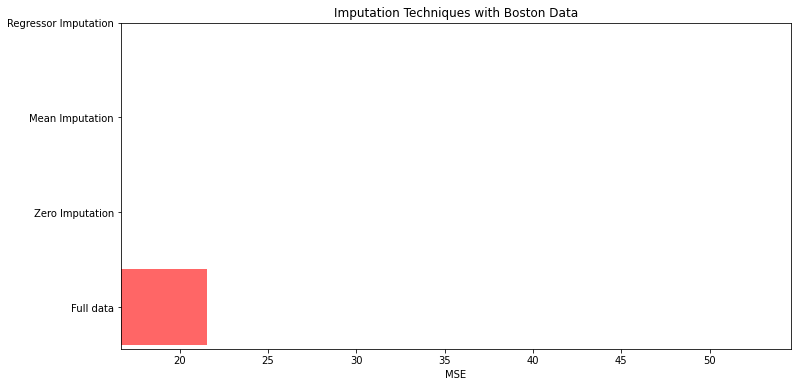

In [44]:
x_labels = ['Full data','Zero Imputation','Mean Imputation','Regressor Imputation']
colors = ['r', 'g', 'b', 'orange']
plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
for i in np.arange(len(mse)):    
    ax.barh(i, mse[i],color=colors[i], alpha=0.6, align='center')
    ax.set_title('Imputation Techniques with Boston Data')
    ax.set_xlim(left=np.min(mse) * 0.9,right=np.max(mse) * 1.1)
    ax.set_yticks(np.arange(len(mse)))
    ax.set_xlabel('MSE')
    ax.set_yticklabels(x_labels)
    plt.show()

# 乳腺癌预测例子

In [49]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [50]:
data = load_breast_cancer()

In [51]:
rfc = RandomForestClassifier(n_estimators=100,random_state=90)
score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score

0.9648809523809524

0.9631265664160402 71


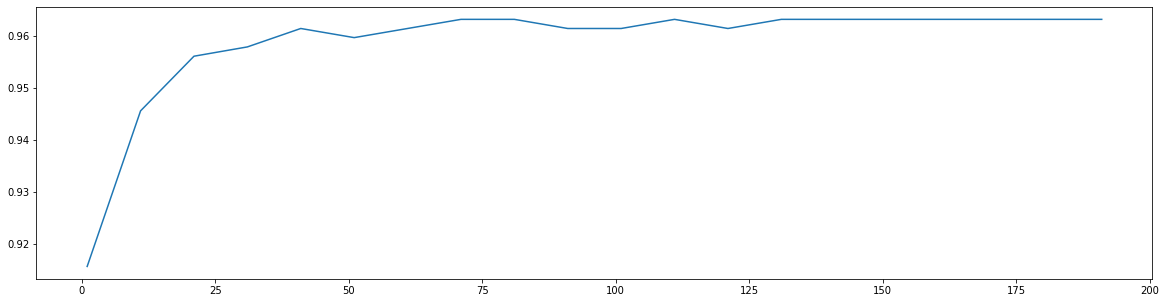

In [53]:
score_list = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1,random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    score_list.append(score)

print(max(score_list),score_list.index(max(score_list))*10+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),score_list)
plt.show()

0.9666353383458647 72


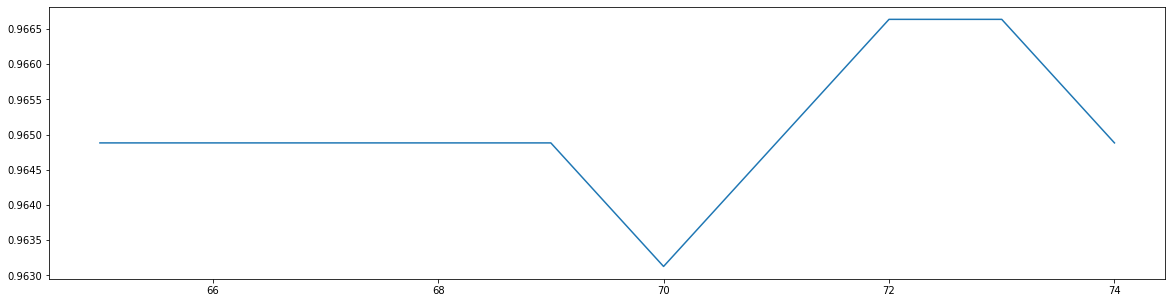

In [57]:
score_list = []
for i in range(65,75):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1,random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    score_list.append(score)

print(max(score_list),([*range(65,75)][score_list.index(max(score_list))]))
plt.figure(figsize=[20,5])
plt.plot(range(65,75),score_list)
plt.show()

## 网格搜索

### 首先通过网格搜索找出最大深度的最佳值

In [58]:
param_grid = {'max_depth':np.arange(1, 20, 1)}
rfc = RandomForestClassifier(n_estimators=72,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=72, random_state=90),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [59]:
GS.best_params_

{'max_depth': 8}

In [60]:
GS.best_score_

0.9683897243107771

## 调整max_features

In [62]:
param_grid = {'max_features':np.arange(5,30,1)}
rfc = RandomForestClassifier(n_estimators=72,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=72, random_state=90),
             param_grid={'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])})

In [63]:
GS.best_params_

{'max_features': 28}

In [64]:
GS.best_score_

0.968421052631579

## 最佳参数验证

In [69]:
rfc = RandomForestClassifier(n_estimators=72
                             ,random_state=90
                             ,max_depth=8
                             ,max_features=28)
score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score

0.9666666666666666